Build a regression model.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sqlite3

In [65]:
# Connects to a SQLite database, select specific columns from a table, and store the results in a pandas dataframe.
conn = sqlite3.connect('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/data/CityBikes Database.db')
query = 'SELECT name, location, categories, rating, Type, latitude, longitude, free_bikes, price_num FROM clean_yelp_citybikes'
yelp_citybikes_df = pd.read_sql(query, conn)


In [66]:
# Replace any null or empty values in the dataframe
yelp_citybikes_df.fillna(value=0, inplace=True)

In [69]:
# Convert 'price' column to numeric type, replacing non-numeric values with NaN
yelp_citybikes_df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Fill any NaN or null values with a default value
yelp_citybikes_df.fillna(value=0, inplace=True)


In [70]:
# Dependent variable is 'free_bikes'
y = yelp_citybikes_df['free_bikes']

# Independent variables are 'rating', 'price', 'latitude', and 'longitude'
X = yelp_citybikes_df[['rating', 'price', 'latitude', 'longitude']]

In [71]:
# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the model using OLS
model = sm.OLS(y, X).fit()

Provide model output and an interpretation of the results. 

In [72]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     21.99
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           4.19e-14
Time:                        21:13:06   Log-Likelihood:                -13087.
No. Observations:                3572   AIC:                         2.618e+04
Df Residuals:                    3568   BIC:                         2.621e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3870.7922    492.305      7.863      0.0

###### 

- The R-squared value of 0.018 suggests that only a small percentage of the variance in the dependent variable (free_bikes) can be explained by the independent variables included in the model (rating, price, latitude, and longitude).

- The F-statistic of 21.99 and the associated probability (Prob (F-statistic): 4.19e-14) suggest that the model as a whole is statistically significant.

- The coefficients of the independent variables indicate the direction and magnitude of their relationship with the dependent variable. The intercept (const) is 3870.7922, meaning that the predicted value of free_bikes when all other independent variables are zero is 3870.7922.

- The coefficient for the rating variable is 0.3066, indicating that a one-unit increase in rating is associated with a 0.3066 increase in free_bikes, holding other variables constant.

The coefficient for the price variable is -7.852e-11, indicating that the effect of price on free_bikes is very small, and not statistically significant.

The coefficient for the latitude variable is -74.8505, indicating that a one-unit increase in latitude is associated with a 74.8505 decrease in free_bikes, holding other variables constant.

The coefficient for the longitude variable is 18.9032, indicating that a one-unit increase in longitude is associated with a 18.9032 increase in free_bikes, holding other variables constant.

The Durbin-Watson statistic is 0.184, which is less than 2, indicating that there may be autocorrelation present in the residuals.

The Jarque-Bera (JB) test statistic is 1551.572, and the associated probability is close to 0, indicating that the residuals are not normally distributed.

The AIC and BIC values are measures of the quality of the model fit, with lower values indicating a better fit. In this case, the AIC is 2.618e+04 and the BIC is 2.621e+04.

# Stretch

How can you turn the regression model into a classification model?

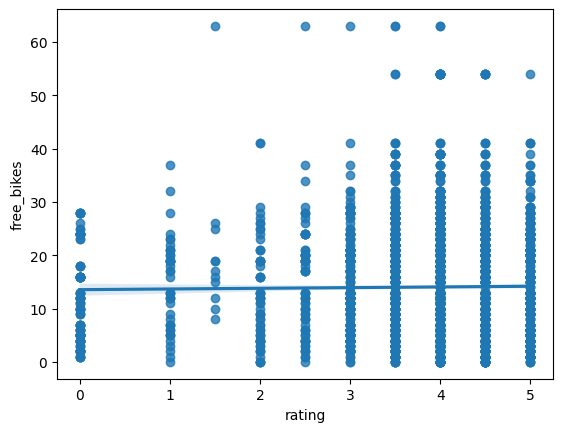

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x='rating', y='free_bikes', data= yelp_citybikes_df)
plt.show()

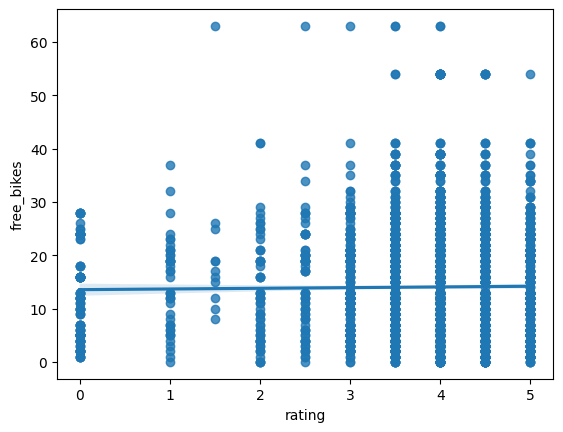

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x='rating', y='free_bikes', data= yelp_citybikes_df)
plt.show()

In [57]:
yelp_citybikes_df.head(-5)

,name,location,categories,rating,price,Type,latitude,longitude,free_bikes
0,Leicester Square Gardens,"001163 - Wardour Street, Soho","[{'alias': 'landmarks', 'title': 'Landmarks & ...",3.5,0.0,Park,51.512515,-0.133202,16
1,Leicester Square,"001163 - Wardour Street, Soho","[{'alias': 'landmarks', 'title': 'Landmarks & ...",4.0,0.0,Park,51.512515,-0.133202,16
2,Allen Gardens,"200003 - Cheshire Street, Bethnal Green","[{'alias': 'parks', 'title': 'Parks'}]",5.0,0.0,Park,51.523880,-0.065076,18
3,Weavers Fields,"200003 - Cheshire Street, Bethnal Green","[{'alias': 'parks', 'title': 'Parks'}]",4.0,0.0,Park,51.523880,-0.065076,18
4,Myddelton Square Park,"001104 - Claremont Square, Angel","[{'alias': 'parks', 'title': 'Parks'}]",3.0,0.0,Park,51.531667,-0.109915,11
...,...,...,...,...,...,...,...,...,...
3562,Garys Fish House,"200027 - Ford Road, Old Ford","[{'alias': 'fishnchips', 'title': 'Fish & Chip...",5.0,0.0,Restaurant,51.532513,-0.033085,4
3563,Fiesta's Cafe,"200027 - Ford Road, Old Ford","[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,0.0,Restaurant,51.532513,-0.033085,4
3564,Lord Morpeth,"200027 - Ford Road, Old Ford","[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,0.0,Restaurant,51.532513,-0.033085,4
3565,St Paul's Cafe Bow,"200027 - Ford Road, Old Ford","[{'alias': 'cafes', 'title': 'Cafes'}]",5.0,0.0,Restaurant,51.532513,-0.033085,4


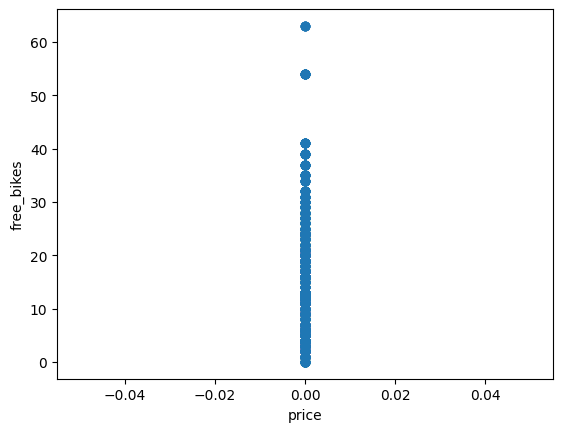

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the regression line
sns.regplot(x='price', y='free_bikes', data= yelp_citybikes_df)
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U25'), dtype('float64')) -> None

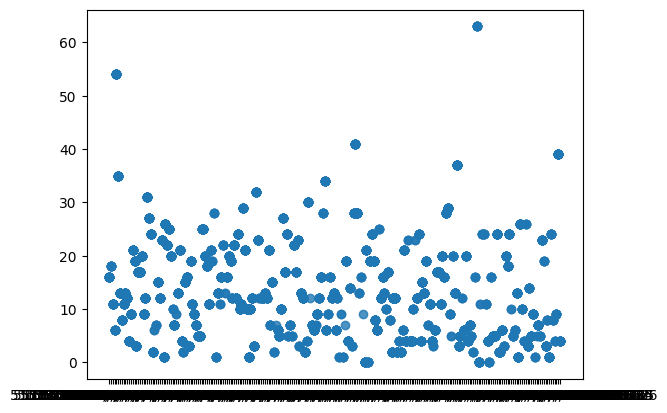

In [40]:
yelp_citybikes_df['lat_long'] = yelp_citybikes_df['latitude'].astype(str) + ', ' + yelp_citybikes_df['longitude'].astype(str)
sns.regplot(x='lat_long', y='free_bikes', data=yelp_citybikes_df)
plt.show()


In [35]:
print(yelp_citybikes_df['latitude'].isnull().sum())
print(yelp_citybikes_df['longitude'].isnull().sum())
print(yelp_citybikes_df['latitude'].dtype)
print(yelp_citybikes_df['longitude'].dtype)

0
0
float64
float64
